In [35]:
%load_ext autoreload
%autoreload 2
from solver_code_new import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


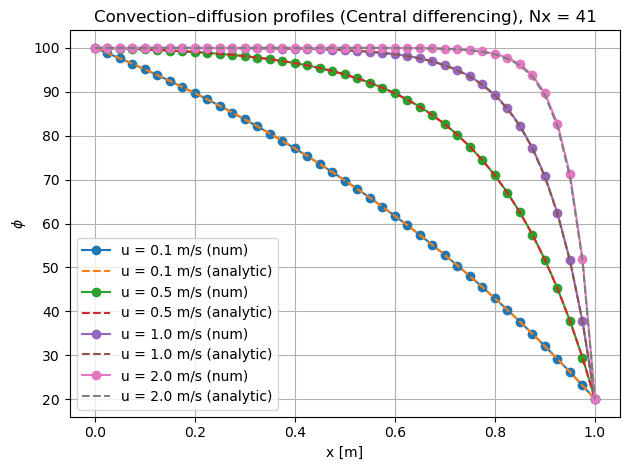

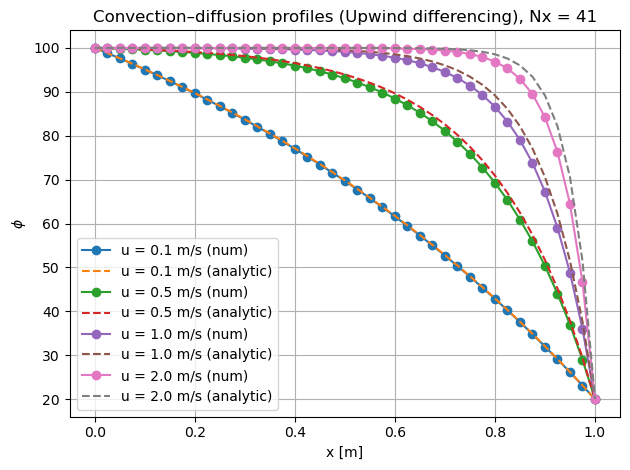

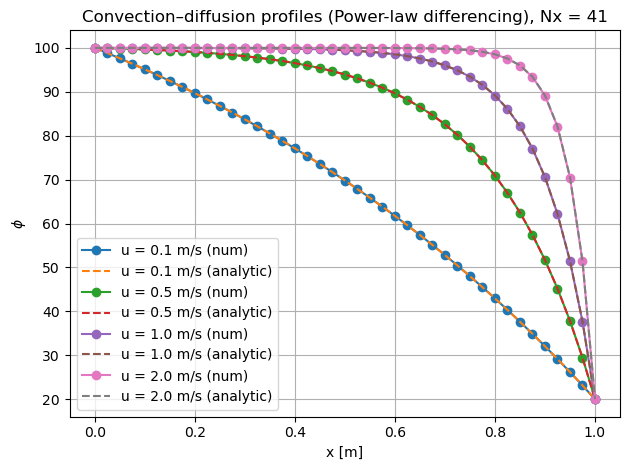

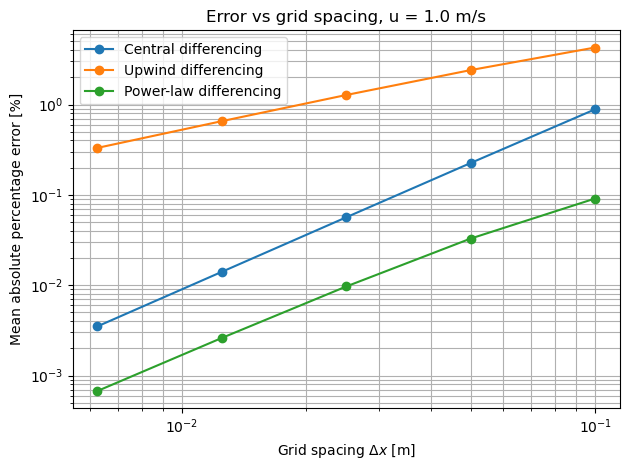

In [18]:
# velocities to test and grid sizes for error studies

L = 1.0             # domain length
rho = 1.0           # fluid density
Gamma = 0.1         # fluid diffusion coefficient
phi_0 = 100.0       # left boundary value
phi_L = 20.0        # right boundary value

velocities = [0.1, 0.5, 1.0, 2.0]        # m/s
Nx_list_error = [11, 21, 41, 81, 161]    # total points including boundaries
u_for_error_plot = 1.0                   # velocity used in error vs dx plots
Nx_for_profiles = 41                     # grid size used in profile plots


schemes = {"CD": "Central differencing",
           "UD": "Upwind differencing",
           "PL": "Power-law differencing"}


Nx = Nx_for_profiles

for scheme_id, scheme_name in schemes.items():
    plt.figure()
    for u in velocities:
        x, phi_num = solver(Nx, L, rho, u, Gamma, phi_0, phi_L, scheme_id)
        phi_exact, Pe = analytical_phi(x, L, rho, u, Gamma, phi_0, phi_L)
        plt.plot(x, phi_num, marker="o", linestyle="-", label=f"u = {u} m/s (num)")
        plt.plot(x, phi_exact, linestyle="--", label=f"u = {u} m/s (analytic)")

    plt.xlabel("x [m]")
    plt.ylabel(r"$\phi$")
    plt.title(f"Convection–diffusion profiles ({scheme_name}), Nx = {Nx}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()




plt.figure()
for scheme_id, scheme_name in schemes.items():
    dx_list = []
    err_list = []
    for Nx in Nx_list_error:
        x, phi_num = solver(
            Nx, L, rho, u_for_error_plot, Gamma, phi_0, phi_L, scheme_id
        )
        phi_exact, Pe = analytical_phi(x, L, rho, u_for_error_plot, Gamma, phi_0, phi_L)
        # use internal nodes only in the error, consistent with discretisation
        err = mean_absolute_percentage_error(phi_num[1:-1], phi_exact[1:-1])
        dx = L / (Nx - 1)
        dx_list.append(dx)
        err_list.append(err)

    plt.loglog(dx_list, err_list, marker="o", linestyle="-", label=scheme_name)

plt.xlabel(r"Grid spacing $\Delta x$ [m]")
plt.ylabel("Mean absolute percentage error [%]")
plt.title(f"Error vs grid spacing, u = {u_for_error_plot} m/s")
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The local Peclet number is 1.25, global Pecklet number is 5.0.
The local Peclet number is 1.0, global Pecklet number is 5.0.
The local Peclet number is 0.8333333333333333, global Pecklet number is 5.0.
The local Peclet number is 0.7142857142857142, global Pecklet number is 5.0.
The local Peclet number is 0.625, global Pecklet number is 5.0.
The local Peclet number is 0.5555555555555556, global Pecklet number is 5.0.
The local Peclet number is 0.5, global Pecklet number is 5.0.
The local Peclet number is 0.4545454545454546, global Pecklet number is 5.0.
The local Peclet number is 0.41666666666666663, global Pecklet number is 5.0.
The local Peclet number is 0.38461538461538464, global Pecklet number is 5.0.
The local Peclet number is 0.3571428571428571, global Pecklet number is 5.0.
The local Peclet number is 0.3333333333333333, global Pecklet number is 5.0.
The local Peclet number is 0.3125, global Pecklet number is 5.0.
The local Peclet number is 0.29411764705882354, global Pecklet num

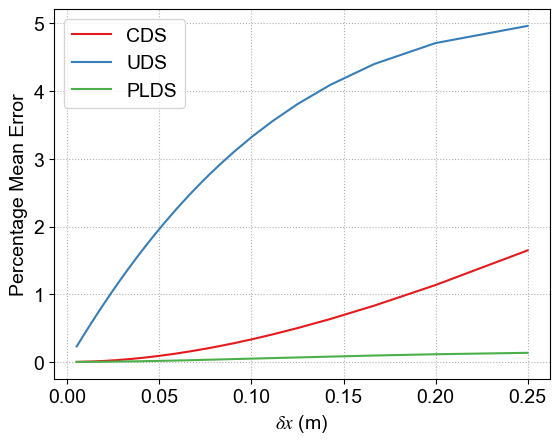

In [52]:
L = 1.0             # domain length
rho = 0.5           # fluid density
gamma = 0.5         # fluid diffusion coefficient
phi_0 = 100.0       # left boundary value
phi_L = 20.0        # right boundary value
number_of_grid = 10
u = 5
scheme_list = ['CDS', 'UDS', 'PLDS']
number_of_grid_list = np.arange(5, 200, 1)

# plot_the_result(L, rho, gamma, phi_0, phi_L, number_of_grid, u, scheme_list)
error_plot(L, rho, gamma, phi_0, phi_L, u, number_of_grid_list, scheme_list)
